# 045143_XỬ LÝ ẢNH VÀ VIDEO
# Homework 2
**Prof:** Võ Tuấn Kiệt

**Name:** Nguyễn Thanh Trung    
**ID:** 1814514

# Preparation

In [57]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [58]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import imutils

In [59]:
%cd /content/drive/MyDrive/045143/HW2/

/content/drive/MyDrive/045143/HW2


In [60]:
# Hàm đọc và chuyển ảnh sang ảnh xám
def read_image(image_path): 
  image = cv2.imread(image_path) 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

# Ảnh 1

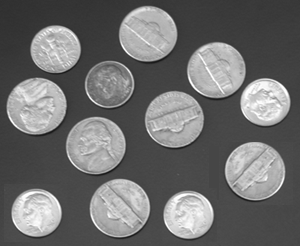

In [61]:
image1 = read_image('coins.png')
cv2_imshow(image1)

- Làm mờ ảnh bằng bộ lọc trung vị hoặc lọc Gaussian làm mờ, loại bớt nhiễu trước khi lấy ngưỡng

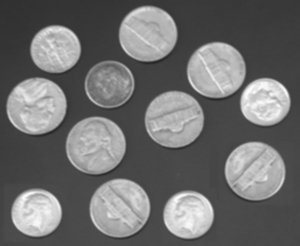

In [62]:
blurred = cv2.GaussianBlur(image1, (3,3), 0)
#blurred = cv2.medianBlur(image1, 3)
cv2_imshow(blurred)

- Thực hiện lấy ngưỡng Otsu, kết quả mức ngưỡng lấy được là T = 126. Tuy nhiên ảnh sau khi lấy ngưỡng có một đồng xu bị khuyết do giá trị pixel ở giữa thấp hơn 126 nên bị phân vùng màu đen.

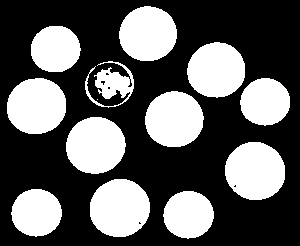

Mức ngưỡng quyết định là:  126


In [63]:
ret, threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(threshold)
print('Mức ngưỡng quyết định là: ', int(ret))

- Để lấp đầy các pixel màu đen của đồng xu bị khuyết thành màu trắng, em thực hiện phép toán đóng với kernel dạng elip với kích thước 11x11. Kết quả thu được đã lấp đầy được các giá trị pixel màu đen của đồng xu bị khuyết.
- Tuy nhiên, các các pixel của các đồng xu khác lại bị dính vào nhau nên em tiến hành xói mòn ảnh với kernel dạng elip với kích thước 11x11 sau đó tiếp tục giản nở ảnh đã xói mòn với kích thước kernel nhỏ hơn 9x9 để được ảnh có các đồng xu không bị dính với nhau.

Ảnh sau khi thực hiện phép toán đóng


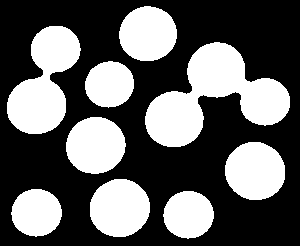

Ảnh sau khi thực hiện xói mòn


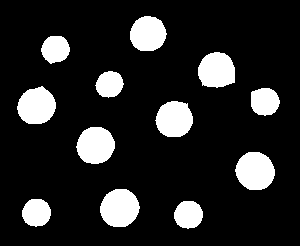

Ảnh sau khi thực hiện giản nở


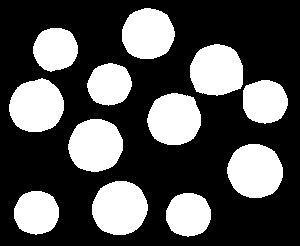

In [64]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
erosion = cv2.erode(closing, kernel, iterations = 2)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
dilation = cv2.dilate(erosion, kernel, iterations = 2)

print('Ảnh sau khi thực hiện phép toán đóng')
cv2_imshow(closing)

print('Ảnh sau khi thực hiện xói mòn')
cv2_imshow(erosion)

print('Ảnh sau khi thực hiện giản nở')
cv2_imshow(dilation)

- Sau khi có được kết quả ảnh qua bước hình thái học, em dùng thư viện của opencv để lấy contours ảnh. Kết quả thu được khá tốt, đếm được chính xác 12 đồng xu và vẽ được đường bao lên các đồng xu. Tuy nhiên, các đường bao này không thật sự quá tròn và khớp với đồng xu do các phép biến đổi trước đó đã làm méo dạng đồng xu trong ảnh. 

Bức ảnh có 12 đồng tiền


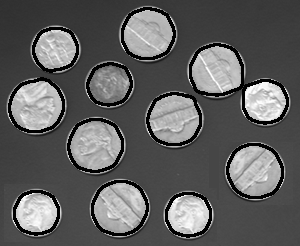

In [65]:
contours, _ = cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

print("Bức ảnh có %i đồng tiền" % len(contours))
img = cv2.drawContours(image1, contours, -1, (0,0,255), 2)
cv2_imshow(img)

# Ảnh 2

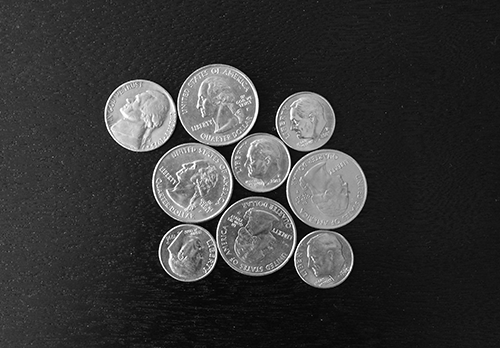

In [66]:
image2 = read_image('coins_01.png')
cv2_imshow(image2)

- Ta thực hiện giống đối với bài số 1. Kết quả cũng đếm đúng 9 đồng xu, tuy nhiên contour lúc này quá tệ, gần như không bao được đồng xu. Vì các đồng xu được đặt sát nhau nên sau khi lấy phép toán đóng, các đồng xu bị kết nối với nhau quá nhiều dẫn đến khi xói mòn gây ra nhiều biến dạng cho mỗi đồng xu nên kết quả vẽ đường bao không tốt.

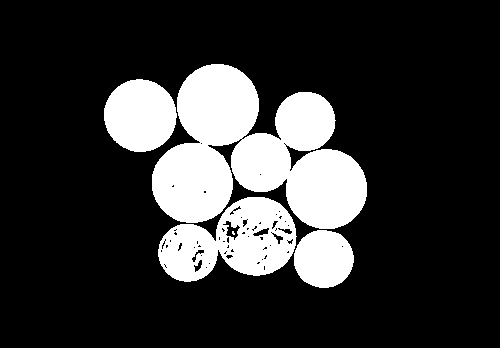

Mức ngưỡng quyết định là:  90
Ảnh sau khi thực hiện phép toán đóng


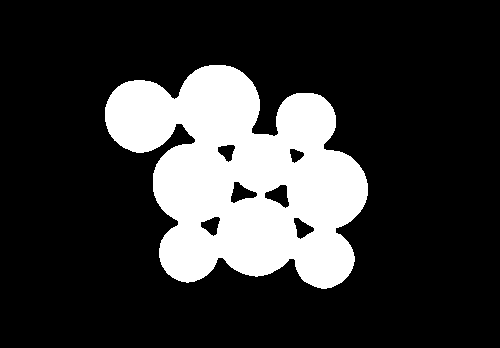

Ảnh sau khi thực hiện xói mòn


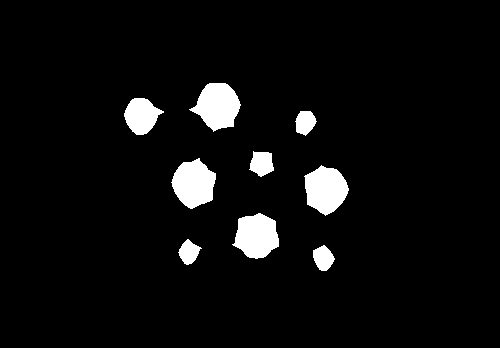

Ảnh sau khi thực hiện giản nở


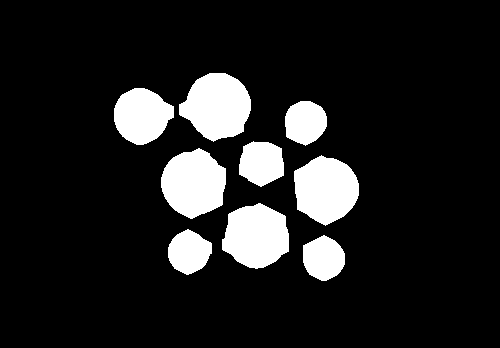

Bức ảnh có 9 đồng tiền


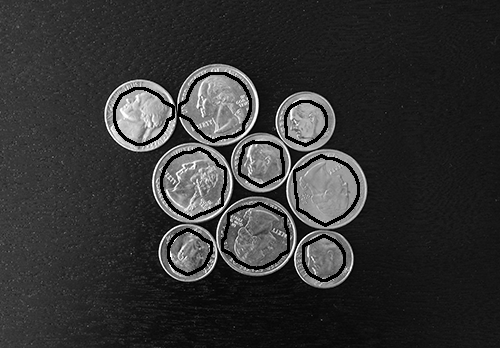

In [67]:
blurred = cv2.GaussianBlur(image2, (3,3), 0)
#blurred = cv2.medianBlur(image2, 3)
# cv2_imshow(blurred)
ret, threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(threshold)
print('Mức ngưỡng quyết định là: ', int(ret))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
erosion = cv2.erode(closing, kernel, iterations = 9)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
dilation = cv2.dilate(erosion, kernel, iterations = 5)

print('Ảnh sau khi thực hiện phép toán đóng')
cv2_imshow(closing)

print('Ảnh sau khi thực hiện xói mòn')
cv2_imshow(erosion)

print('Ảnh sau khi thực hiện giản nở')
cv2_imshow(dilation)

contours, _ = cv2.findContours(dilation , cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

print("Bức ảnh có %i đồng tiền" % len(contours))
img = cv2.drawContours(image2, contours, -1, (0,0,255), 2)
cv2_imshow(img)

- Em sẽ thử dùng phương pháp **watershed** để vẽ đường bao tốt hơn. Đầu tiên cũng thực hiện lọc nhiễu, lấy ngưỡng và thực hiện phép toán đóng để lấp đầy các pixel bị phân sai vùng.

Kết quả sau khi lấy ngưỡng


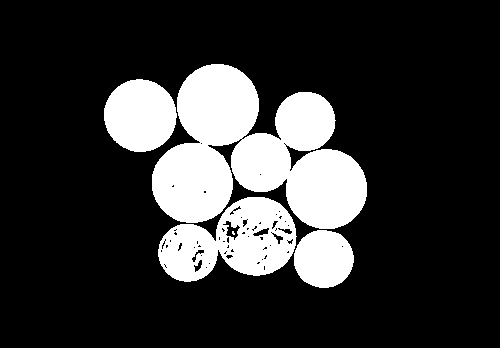

Kết quả sau khi thực hiện phép toán đóng


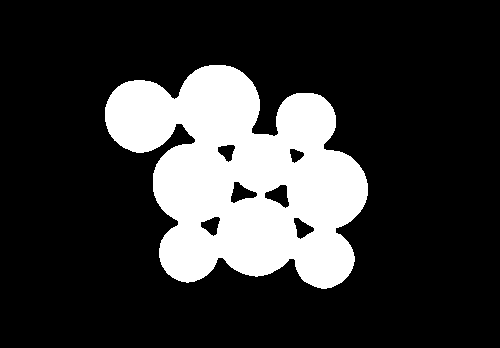

In [68]:
image2 = read_image('coins_01.png')
blurred = cv2.GaussianBlur(image2, (3,3), 0)

threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
print('Kết quả sau khi lấy ngưỡng')
cv2_imshow(threshold)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
background = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
print('Kết quả sau khi thực hiện phép toán đóng')
cv2_imshow(background)

- Sau đó thực hiện tính distance transform sau đó thực hiện lấy ngưỡng và xói mòn ảnh sau khi tính distance transform.

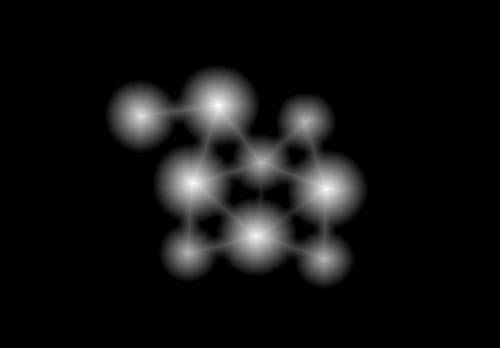

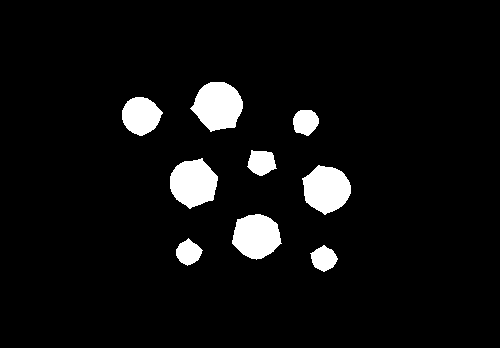

In [69]:
distMap = cv2.distanceTransform(background, cv2.DIST_L2, 5)
cv2.normalize(distMap, distMap, 0.0, 255.0, cv2.NORM_MINMAX)
distMap = np.uint8(distMap)
cv2_imshow(distMap)
foreground = cv2.threshold(distMap, 100, 255, cv2.THRESH_BINARY)[1]
foreground = cv2.erode(foreground, None, 2)
cv2_imshow(foreground)

- Vùng unknown là vùng giao giữa vùng cảnh và vùng nền, tính được bằng cách lấy hiệu giữa foreground và background. Sau đó thực hiện tìm các connected componet của vùng cảnh. Sau đó gán giá trị các pixel vùng unknown bằng 0 và các giá trị vùng nền và vùng cảnh được cộng thêm 1 thành số dương. Cuối cùng, tiến hành hàm watershed.

In [70]:
unknown = cv2.subtract(background, foreground)
 
ret, markers = cv2.connectedComponents(foreground)
markers = markers + 1
markers[unknown == 255] = 0
markers = markers.astype('int32')

image = cv2.imread('coins_01.png',1)
markers = cv2.watershed(image, markers)

- Tiến hành vẽ kết quả thu được. Kết quả đường bao thu được tốt hơn so với trường hợp khảo sát ở trên, các đường bao đã bo khá tròn các đồng xu và xác định đúng số lượng đồng xu là 9.

Số lượng đồng xu là:  9


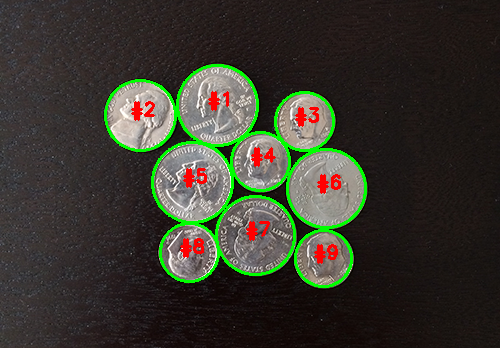

In [71]:
count = 0
for m in np.unique(markers):

	if m < 2:
		continue

	count += 1
	mask = np.zeros(markers.shape, dtype="uint8")
	mask[markers == m] = 255

	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(m-1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

print('Số lượng đồng xu là: ', count) 
cv2_imshow(image)

# Ảnh 3

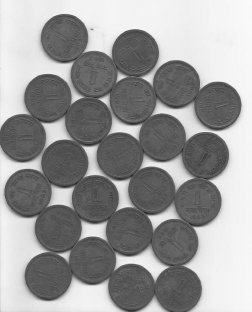

In [72]:
image3 = read_image('water_coins.jpg')
cv2_imshow(image3)

- Đối với hình số 5 thực hiện tương tự với hình số 2. Tuy nhiên chỉ thay đổi ở việc ảnh sau blurred sau khi lấy ngưỡng phải đổi ngược lại các giá trị pixel của đồng xu và nền bằng cách lấy 255 trừ đi giá trị pixel tại điểm đó, không cần dùng phép toán đóng và chọn lại kích thước bộ lọc của quá trình xói mòn sao cho phù hợp.

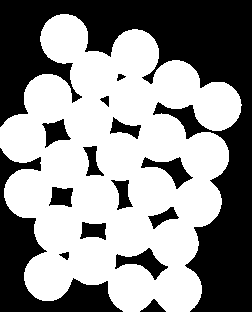

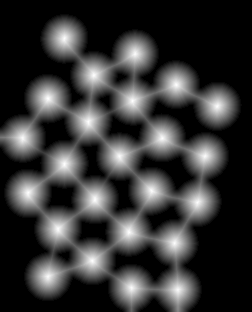

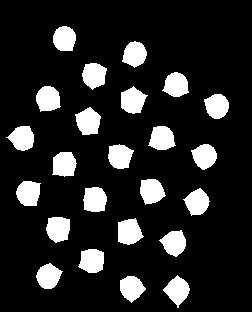

Số lượng đồng xu là:  24


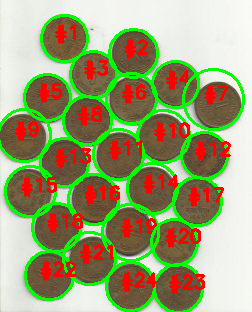

In [73]:
blurred = cv2.GaussianBlur(image3, (3,3), 0)

threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Lấy ảnh âm bản
threshold = 255 - threshold
cv2_imshow(threshold)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
# background không cần thực hiện phép toán đóng
background = threshold

# Thực hiện distance transform
distMap = cv2.distanceTransform(background, cv2.DIST_L2, 5)
cv2.normalize(distMap, distMap, 0.0, 255.0, cv2.NORM_MINMAX)
distMap = np.uint8(distMap)
cv2_imshow(distMap)
foreground = cv2.threshold(distMap, 100, 255, cv2.THRESH_BINARY)[1]
foreground = cv2.erode(foreground, kernel, 5)
cv2_imshow(foreground)

unknown = cv2.subtract(background, foreground)
 
ret, markers = cv2.connectedComponents(foreground)
markers = markers + 1
markers[unknown == 255] = 0
markers = markers.astype('int32')

image = cv2.imread('water_coins.jpg',1)
markers = cv2.watershed(image, markers)


count = 0
for m in np.unique(markers):

	if m < 2:
		continue

	count += 1
	mask = np.zeros(markers.shape, dtype="uint8")
	mask[markers == m] = 255

	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(m-1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

print('Số lượng đồng xu là: ', count) 
cv2_imshow(image)

- Kết quả thu được đếm chính xác 24 đồng xu, đường bao cũng vẽ khá tốt bo tròn quanh đồng tiên. Tuy nhiên vẫn còn nhiều góc bị méo bị lấn sang đồng xu bên cạnh ví dụ như đồng xu số 7.

# Ảnh 4

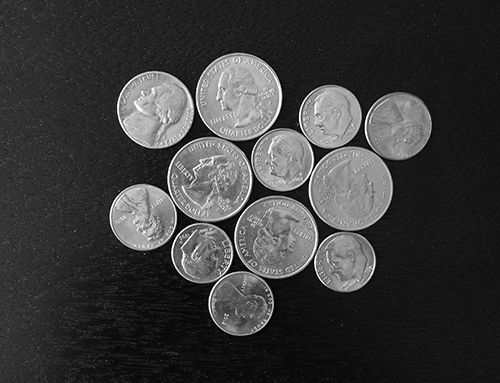

In [74]:
image4 = read_image('coins_02.png')
cv2_imshow(image4)

- Tiến hành làm mịn ảnh và lấy ngưỡng như làm ở hình 2. Sau thực hiện phép toán đóng để lấy ảnh backgound, thực hiện distance transform sau đó lấy ngưỡng rồi xói mòn để lấy ảnh foreground. Tuy nhiên, vùng pixel của đồng xu dưới cùng quá nhỏ nên có thể đường tròn bo trên ảnh ngõ ra sẽ bị sai lệch.

Kết quả sau khi lấy ngưỡng


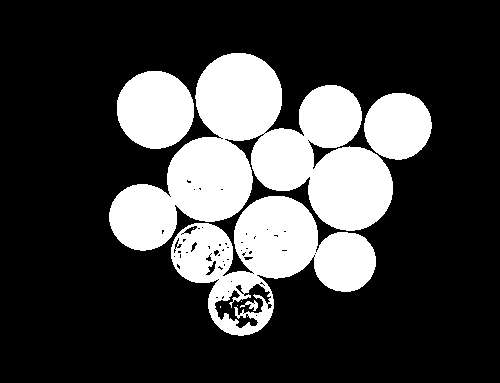

Kết quả sau khi thực hiện phép toán đóng


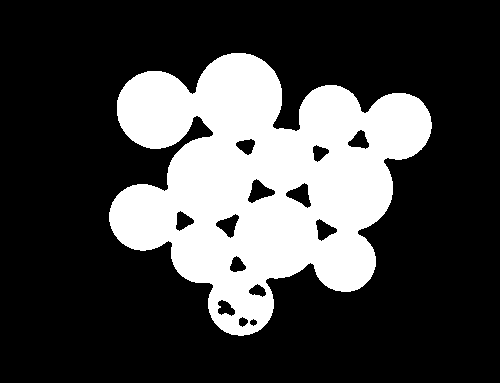

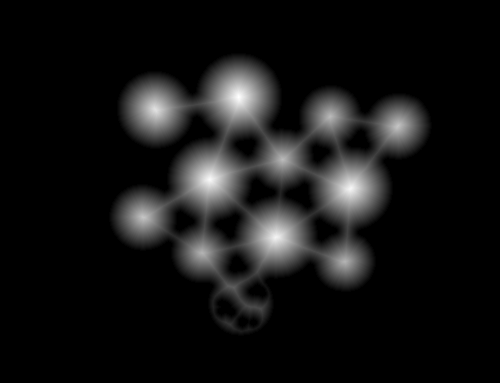

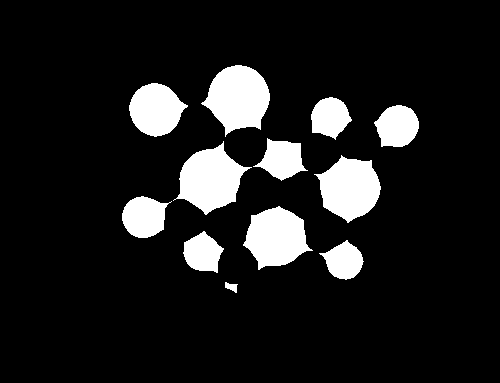

In [75]:
blurred = cv2.GaussianBlur(image4, (3,3), 0)
threshold = cv2.threshold(blurred , 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
print('Kết quả sau khi lấy ngưỡng')
cv2_imshow(threshold)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
background = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)

print('Kết quả sau khi thực hiện phép toán đóng')
cv2_imshow(background)

distMap = cv2.distanceTransform(background, cv2.DIST_L2, 5)
cv2.normalize(distMap, distMap, 0.0, 255.0, cv2.NORM_MINMAX)
distMap = np.uint8(distMap)
cv2_imshow(distMap)
foreground = cv2.threshold(distMap, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
foreground = cv2.erode(foreground, kernel, 1)
cv2_imshow(foreground)

- Kết quả thực sự như vậy, tuy đã đếm đúng 12 đồng xu nhưng vòng tròn cuối cùng đã bị xác định nhỏ hơn và lệch so với đồng xu.

Số lượng đồng xu là:  12


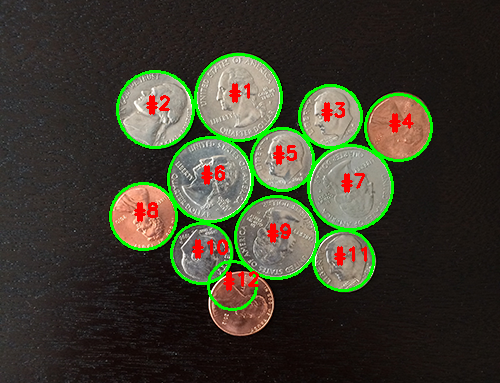

In [76]:
unknown = cv2.subtract(background, foreground)
 
ret, markers = cv2.connectedComponents(foreground)
markers = markers + 1
markers[unknown == 255] = 0
markers = markers.astype('int32')

image = cv2.imread('coins_02.png',1)
markers = cv2.watershed(image, markers)


count = 0
for m in np.unique(markers):

	if m < 2:
		continue

	count += 1
	mask = np.zeros(markers.shape, dtype="uint8")
	mask[markers == m] = 255

	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(m-1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

print('Số lượng đồng xu là: ', count) 
cv2_imshow(image)

- Để khắc phục tình trạng trên, em có tìm hiểu một số cách trên mạng và thực hiện chuyển ảnh đầu vào từ không gian màu RGB sang không gian màu HSV và sử dụng kênh V để tiến hành lấy ngưỡng. Sau đó dùng phép toán đóng để tìm background.

Kết quả sau khi lấy ngưỡng


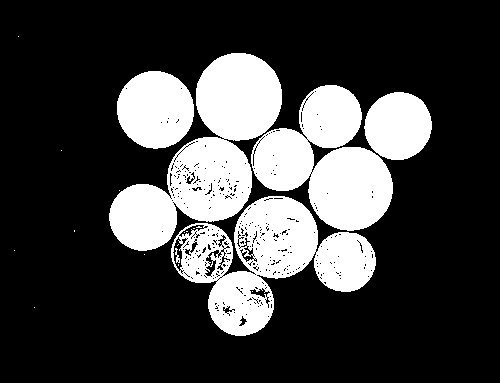

Kết quả sau khi thực hiện phép toán đóng


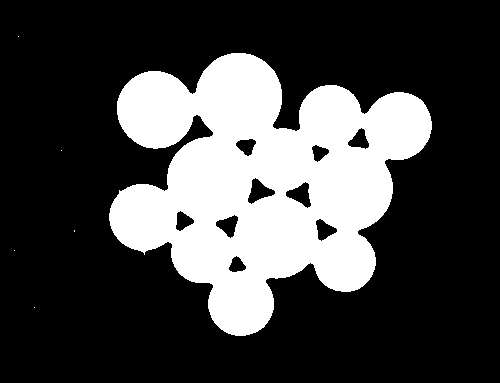

In [77]:
image4 = cv2.imread('coins_02.png')
hsv = cv2.cvtColor(image4, cv2.COLOR_BGR2HSV)

threshold = cv2.threshold(hsv[:, :, 2], 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
print('Kết quả sau khi lấy ngưỡng')
cv2_imshow(threshold)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
background = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)

print('Kết quả sau khi thực hiện phép toán đóng')
cv2_imshow(background)

- Tiếp theo em thực hiện distance transform và xói mòn ảnh sau khi thực hiện distance transform để lấy foreground. Lúc này kết quả ở đồng xu dưới cùng đầy đặn hơn và có thể cho kết quả tốt hơn.

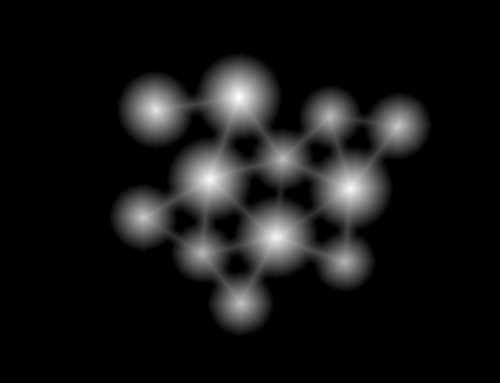

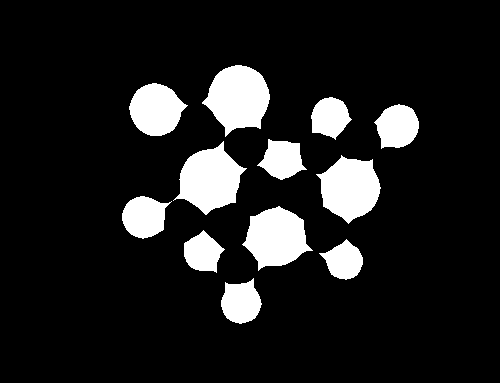

In [78]:
distMap = cv2.distanceTransform(background, cv2.DIST_L2, 5)
cv2.normalize(distMap, distMap, 0.0, 255.0, cv2.NORM_MINMAX)
distMap = np.uint8(distMap)
cv2_imshow(distMap)
foreground = cv2.threshold(distMap, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
foreground = cv2.erode(foreground, kernel, 1)
cv2_imshow(foreground)

- Kết quả thu được chính xác khi xác định đúng 12 đồng xu, các đường bao cũng bo tròn rất tốt các đồng xu, không bị sai lệch ở đồng xu cuối như trường hợp trên.

Số lượng đồng xu là:  12


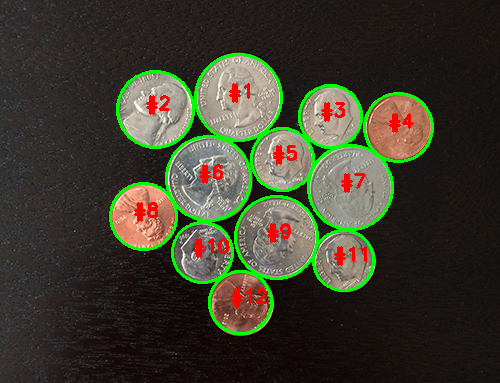

In [79]:
unknown = cv2.subtract(background, foreground)
 
ret, markers = cv2.connectedComponents(foreground)
markers = markers + 1
markers[unknown == 255] = 0
markers = markers.astype('int32')

image = cv2.imread('coins_02.png',1)
markers = cv2.watershed(image, markers)


count = 0
for m in np.unique(markers):

	if m < 2:
		continue

	count += 1
	mask = np.zeros(markers.shape, dtype="uint8")
	mask[markers == m] = 255

	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(m-1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

print('Số lượng đồng xu là: ', count) 
cv2_imshow(image)

# Ảnh 5

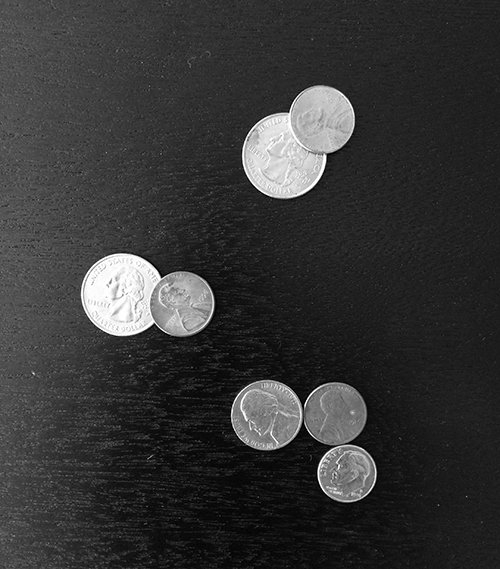

In [80]:
image5 = read_image('coins_03.png')
cv2_imshow(image5)

Kết quả sau khi lấy ngưỡng


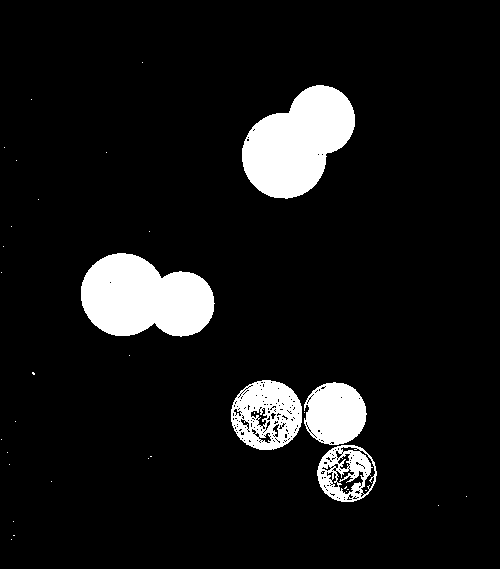

Kết quả sau khi thực hiện phép toán đóng


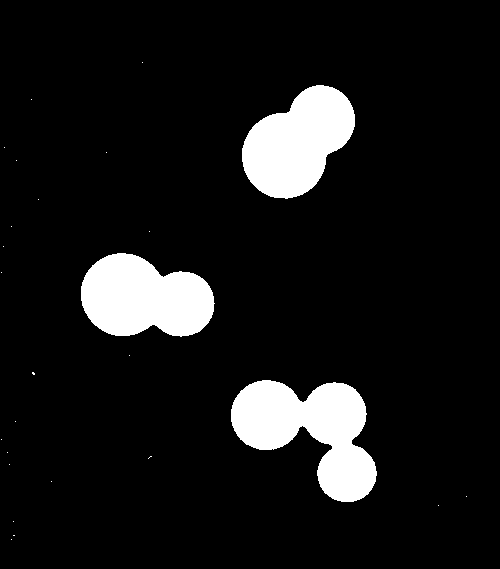

In [81]:
#blurred = cv2.GaussianBlur(image5, (7,7), 0)
image4 = cv2.imread('coins_03.png')
hsv = cv2.cvtColor(image4, cv2.COLOR_BGR2HSV)

threshold = cv2.threshold(hsv[:, :, 2], 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#threshold = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
print('Kết quả sau khi lấy ngưỡng')
cv2_imshow(threshold)


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
background = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
print('Kết quả sau khi thực hiện phép toán đóng')
cv2_imshow(background)

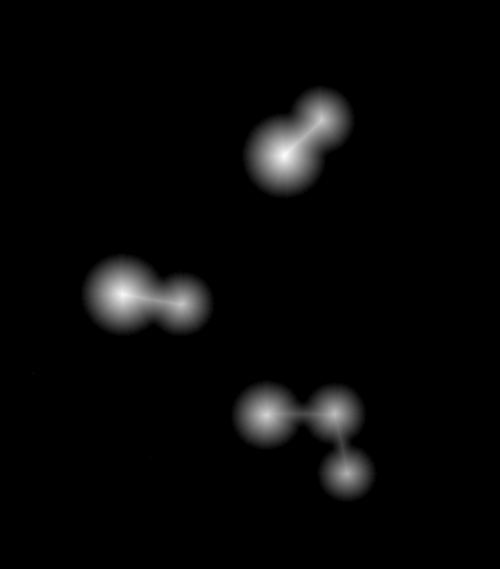

In [82]:
distMap = cv2.distanceTransform(background, cv2.DIST_L2, 5)
cv2.normalize(distMap, distMap, 0.0, 255.0, cv2.NORM_MINMAX)
distMap = np.uint8(distMap)
cv2_imshow(distMap)

- Do vùng chồng lấn của hai đồng xu to hơn vùng của đồng xu nhỏ nhất, nên khi xói mòn ảnh foreground bằng cách tăng kích thước kernel lên, em nhận thấy đồng xu nhỏ nhất sẽ bị mất trước khi vùng bị chồng lấn của hai đồng xu biến mất.
- Do đó, em sẽ thực hiện tách hai phần riêng biệt bằng cách lấy 2 đồng xu to trước rồi lấy 5 đồng xu nhỏ sau. 
  + Lấy 2 đồng xu to: bằng cách tăng kích thước kernel trong quá trình xói mòn đến khi các đồng xu nhỏ đều biến mất. Sau đó thực hiện phép bồi đắp để hai đồng xu to như trong ảnh foreground ban đầu.
  + Lấy 5 đồng xu nhỏ: bằng lấy lấy ảnh foreground ban đầu trừ đi ảnh có 2 đồng xu to. 

Kết quả thu được như các hình bên dưới

foreground  image


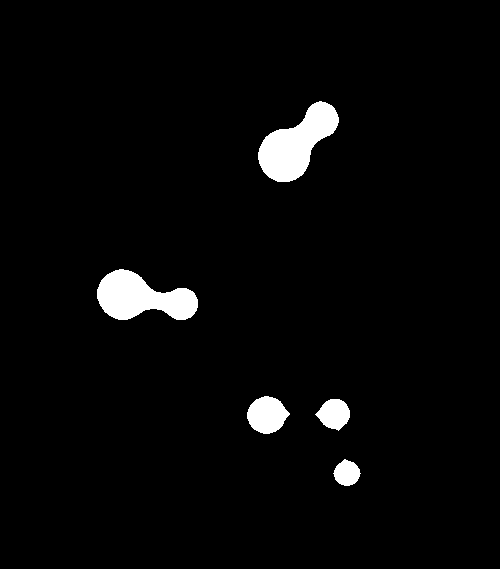

image for 2 big coin


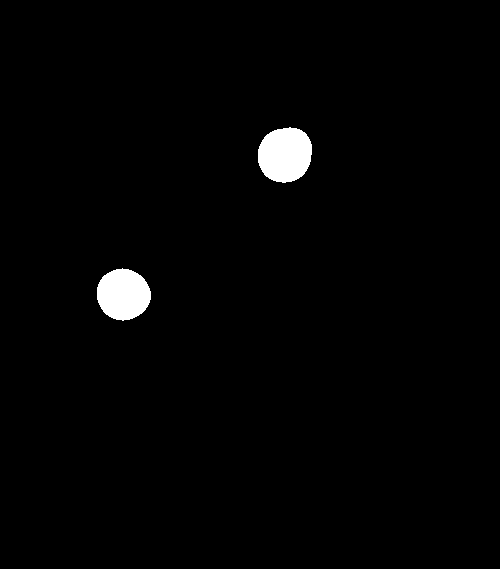

image for 5 small coin


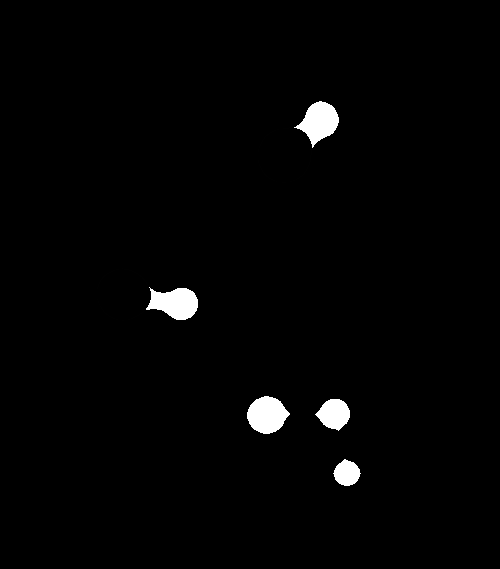

In [83]:
foreground = cv2.threshold(distMap, 100, 255, cv2.THRESH_BINARY)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (41,41))
f1 = cv2.erode(foreground, kernel, 2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (43,43))
f1 = cv2.dilate(f1, kernel, 2)
print('foreground  image')
f2 = foreground - f1
cv2_imshow(foreground)
print('image for 2 big coin')
cv2_imshow(f1)
print('image for 5 small coin')
cv2_imshow(f2)

- Tiếp theo thực hiện xói mòn 2 ảnh f1 (ảnh 2 đồng xu to) và ảnh f2 (ảnh có 5 đồng xu nhỏ) với kích thước kernel nhỏ rồi sau đó cộng hai ảnh này lại sẽ được ảnh foreground mới tách được các vùng bị chồng lấp giữa hai đồng xu. (Kích thước kernel và số lần xói mòn được thực nghiệm để chọn ra giá trị tốt). Kết quả thu được 7 vùng pixel màu trắng tương ứng với 7 đồng xu.

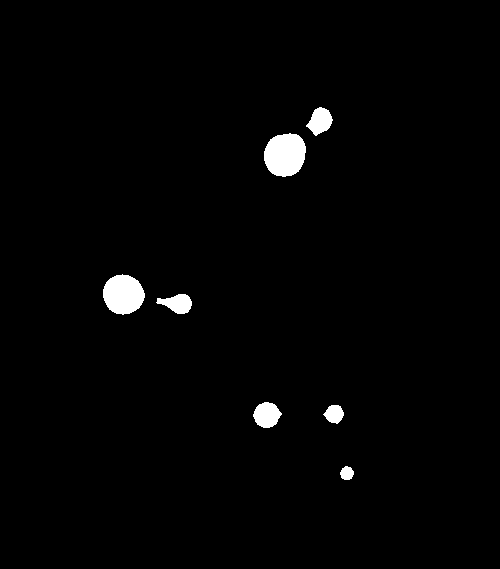

In [84]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
f1 = cv2.erode(f1, kernel, 3)
f2 = cv2.erode(f2, kernel, 2)
foreground = f1 + f2
cv2_imshow(foreground)

- Cuối cùng là thực hiện thuật yoasn watershed, đếm số đồng xu và vẽ đường bao như các trường hợp ở trên. Kết quả thu được đếm đúng 7 đồng xu và các đường bao cũng bo tròn các đồng xu kể cả 4 đồng xu bị overlap với nhau.

Số lượng đồng xu là:  7


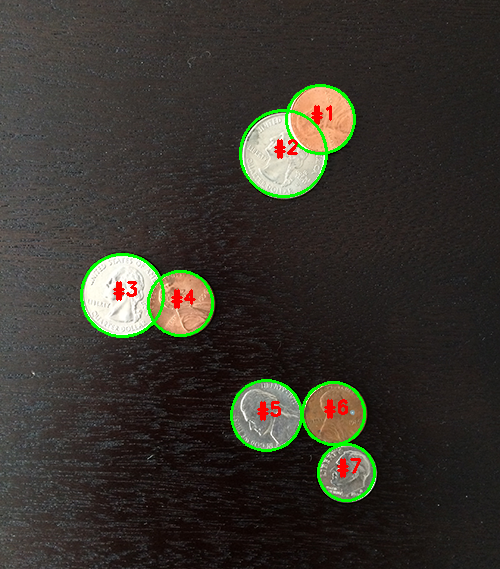

In [85]:
unknown = cv2.subtract(background, foreground)
 
ret, markers = cv2.connectedComponents(foreground)
markers = markers + 1
markers[unknown == 255] = 0
markers = markers.astype('int32')

image = cv2.imread('coins_03.png',1)
markers = cv2.watershed(image, markers)

count = 0
for m in np.unique(markers):

	if m < 2:
		continue

	count += 1
	mask = np.zeros(markers.shape, dtype="uint8")
	mask[markers == m] = 255

	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(m-1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

print('Số lượng đồng xu là: ', count) 
cv2_imshow(image)

# Kết luận

- Các phương pháp hình thái học kết hợp với hàm getcontour của opencv chỉ có thể giải quyết các bài toán đơn giản như hình 1 khi các đồng xu có kích thước ngang ngang nhau và không đặt quá gần nhau.

- Phương pháp sử dụng watershed cho kết quả tốt hơn rất nhiều. Một quy trình cụ thể để giải bài toán này như sau:    
  + Đọc ảnh và chuyển từ không gian màu RGB sang không gian màu HSV.
  + Dùng kênh V của bức ảnh, tiến hành lấy ngưỡng threshold. Thực hiện lấy ảnh âm bản nếu vật thể sau khi lấy ngưỡng có giá trị pixel là 0.
  + Thực hiện phép toán đóng để lấy vùng nền (background). (bước này có thể bỏ qua nếu kết quả lấy ngưỡng tốt, các pixel trong mỗi vật thể không có nhiễu bởi các pixel màu đen như ảnh 3.)
  + Sau đó thực hiện distance tranform, sau đó xói mòn để lấy vùng cảnh (foreground).
  + Thực hiện các phương pháp hình thái học và xử lí khác cần thiết để tách các vật thể bị overlap với nhau (hình 5) để thu ảnh vùng cảnh cuối cùng.
  + Tiếp theo, thực hiện thuật toán watershed với ảnh vùng nền và vùng cảnh đã thu được.
  + Cuối cùng, đếm số lượng đồng xu và vẽ contour.

## Kết quả dùng watershed cho hình 1

Ảnh ban đầu


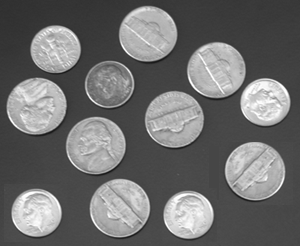

Ảnh sau khi lấy ngưỡng


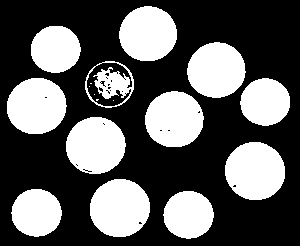

Ảnh vùng nền sau khi thực hiện phép đóng để lấp đầy các pixel màu đen của vật thể


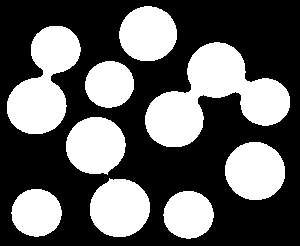

Ảnh sau khi lấy distance tranform


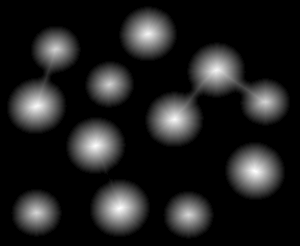

Ảnh sau vùng cảnh


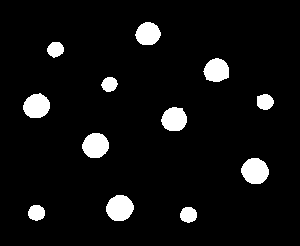

Số lượng đồng xu là:  12


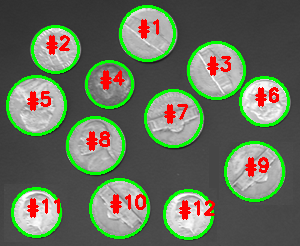

In [87]:
image1 = read_image('coins.png')
print('Ảnh ban đầu')
cv2_imshow(image1)

threshold = cv2.threshold(image1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
print('Ảnh sau khi lấy ngưỡng')
cv2_imshow(threshold)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
background = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
print('Ảnh vùng nền sau khi thực hiện phép đóng để lấp đầy các pixel màu đen của vật thể')
cv2_imshow(background)
# Thực hiện distance transform
distMap = cv2.distanceTransform(background, cv2.DIST_L2, 5)
cv2.normalize(distMap, distMap, 0.0, 255.0, cv2.NORM_MINMAX)
distMap = np.uint8(distMap)
print('Ảnh sau khi lấy distance tranform')
cv2_imshow(distMap)
foreground = cv2.threshold(distMap, 100, 255, cv2.THRESH_BINARY)[1]
foreground = cv2.erode(foreground, kernel, 5)
print('Ảnh sau vùng cảnh')
cv2_imshow(foreground)

unknown = cv2.subtract(background, foreground)
 
ret, markers = cv2.connectedComponents(foreground)
markers = markers + 1
markers[unknown == 255] = 0
markers = markers.astype('int32')

image = cv2.imread('coins.png',1)
markers = cv2.watershed(image, markers)


count = 0
for m in np.unique(markers):

	if m < 2:
		continue

	count += 1
	mask = np.zeros(markers.shape, dtype="uint8")
	mask[markers == m] = 255

	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
 
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(m-1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

print('Số lượng đồng xu là: ', count) 
cv2_imshow(image)